In [1]:
import ml
reload(ml)
from ml import *
import json
import timeit
import scipy
import swifter
import operator
import itertools
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.utils import resample
from sklearn.ensemble import VotingClassifier
from __future__ import division
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set_style('whitegrid')
plt.style.use('seaborn-whitegrid')
%matplotlib inline

__author__ = 'HK Dambanemuya'

In [2]:
# Import features
with open("../Data/features.txt") as file:
    features = json.load(file)
# Initialize Standard Scaler
scaler = StandardScaler() 
# Initialize Feature Values
feature_values = {}
# Import Data
df = pd.read_csv("../Data/prosper_final.csv")
# Separate majority and minority classes
df_majority = df[df.RepaidOrNot==1]
df_minority = df[df.RepaidOrNot==0]
# Down-sample majority class
df_majority_downsampled = resample(df_majority,
                                  replace = False,
                                  n_samples = 10655,
                                  random_state = 42)
# Combine minority class with down-sampled majority class
data = pd.concat([df_majority_downsampled, df_minority])

In [3]:
data.RepaidOrNot.value_counts()

0    10656
1    10655
Name: RepaidOrNot, dtype: int64

## Feature Plots

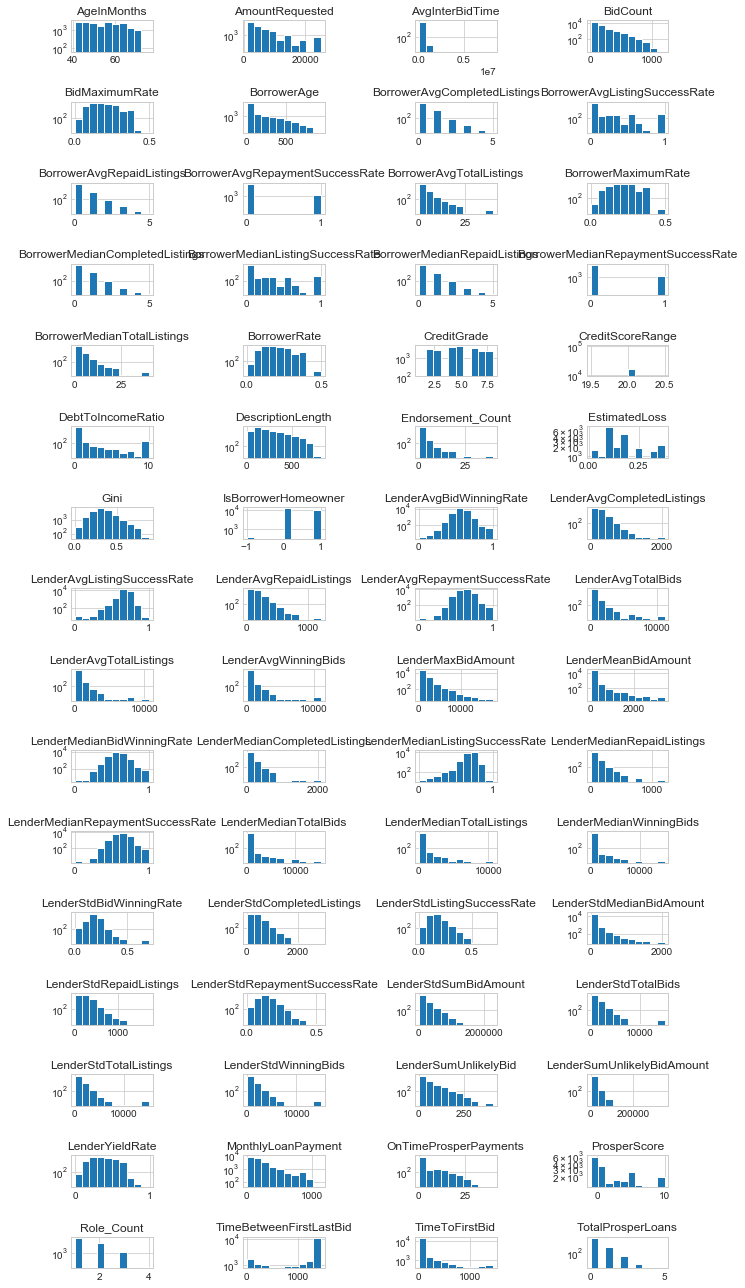

In [4]:
data[features.get("All")].hist(figsize=(10,18), layout=(16,4), log=True)
plt.grid()
plt.tight_layout()
plt.show()

## Logistic Regression

In [5]:
# logit = sm.Logit(data['RepaidOrNot'], 
#                  scaler.fit_transform(data[features.get("All")].fillna(-1)))
# result = logit.fit()
# print result.summary()

## Model Evaluation

In [6]:
X = data[features.get("All")].fillna(-1).as_matrix()
X = scaler.fit_transform(X)
y = data['RepaidOrNot'].as_matrix()
print features.get("All")
evaluation = evaluation_summary(X,y)
feature_values["All Features"] = evaluation.query("Model == 'RF'")["AUC"].item()
evaluation

[u'LenderYieldRate', u'LenderMedianTotalBids', u'LenderStdWinningBids', u'LenderStdTotalBids', u'LenderAvgBidWinningRate', u'LenderStdBidWinningRate', u'LenderMedianWinningBids', u'LenderAvgTotalBids', u'LenderMedianBidWinningRate', u'LenderAvgWinningBids', u'LenderSumUnlikelyBidAmount', u'LenderStdMedianBidAmount', u'LenderStdSumBidAmount', u'LenderSumUnlikelyBid', u'LenderMeanBidAmount', u'LenderMaxBidAmount', u'LenderMedianRepaidListings', u'LenderMedianListingSuccessRate', u'LenderAvgCompletedListings', u'LenderAvgRepaymentSuccessRate', u'LenderStdRepaymentSuccessRate', u'LenderStdTotalListings', u'LenderMedianCompletedListings', u'LenderAvgListingSuccessRate', u'LenderMedianRepaymentSuccessRate', u'LenderMedianTotalListings', u'LenderAvgTotalListings', u'LenderStdRepaidListings', u'LenderAvgRepaidListings', u'LenderStdCompletedListings', u'LenderStdListingSuccessRate', u'BorrowerRate', u'AgeInMonths', u'EstimatedLoss', u'MonthlyLoanPayment', u'AmountRequested', u'BorrowerMaximumRa

,Model,Accuracy,Precision,Recall,F1,AUC
0,QDA,0.598,0.565,0.849,0.679,0.598
1,CART,0.620,0.620,0.621,0.620,0.620
2,GNB,0.667,0.649,0.726,0.685,0.667
3,RF,0.706,0.712,0.691,0.701,0.706
4,LR,0.640,0.856,0.338,0.484,0.640
5,ADB,0.702,0.715,0.673,0.693,0.702


In [7]:
# frank_summary(X, y, features.get("All"))

## Borrower Features

In [8]:
X = data[features.get("Borrower")].fillna(-1).as_matrix()
X = scaler.fit_transform(X)
y = data['RepaidOrNot'].as_matrix()
print features.get("Borrower")
evaluation = evaluation_summary(X,y)
feature_values["Borrower Features"] = evaluation.query("Model == 'RF'")["AUC"].item()
evaluation

[u'BorrowerMaximumRate', u'ProsperScore', u'DebtToIncomeRatio', u'BorrowerAge', u'Endorsement_Count', u'Role_Count', u'CreditGrade', u'CreditScoreRange', u'IsBorrowerHomeowner', u'OnTimeProsperPayments', u'TotalProsperLoans', u'BorrowerAvgCompletedListings', u'BorrowerAvgRepaidListings', u'BorrowerMedianTotalListings', u'BorrowerMedianCompletedListings', u'BorrowerAvgListingSuccessRate', u'BorrowerMedianListingSuccessRate', u'BorrowerMedianRepaymentSuccessRate', u'BorrowerAvgTotalListings', u'BorrowerMedianRepaidListings', u'BorrowerAvgRepaymentSuccessRate']
Completed QDA in 0.2817115 seconds
Completed CART in 0.4559514 seconds
Completed GNB in 0.1146175 seconds
Completed RF in 34.8771052 seconds
Completed LR in 0.7659011 seconds
Completed ADB in 3.1800052 seconds


,Model,Accuracy,Precision,Recall,F1,AUC
0,QDA,0.628,0.596,0.799,0.682,0.628
1,CART,0.618,0.618,0.618,0.618,0.618
2,GNB,0.653,0.751,0.457,0.568,0.653
3,RF,0.692,0.698,0.679,0.688,0.692
4,LR,0.619,0.854,0.287,0.430,0.619
5,ADB,0.692,0.706,0.657,0.681,0.692


In [9]:
# frank_summary(X, y, features.get("Borrower"))

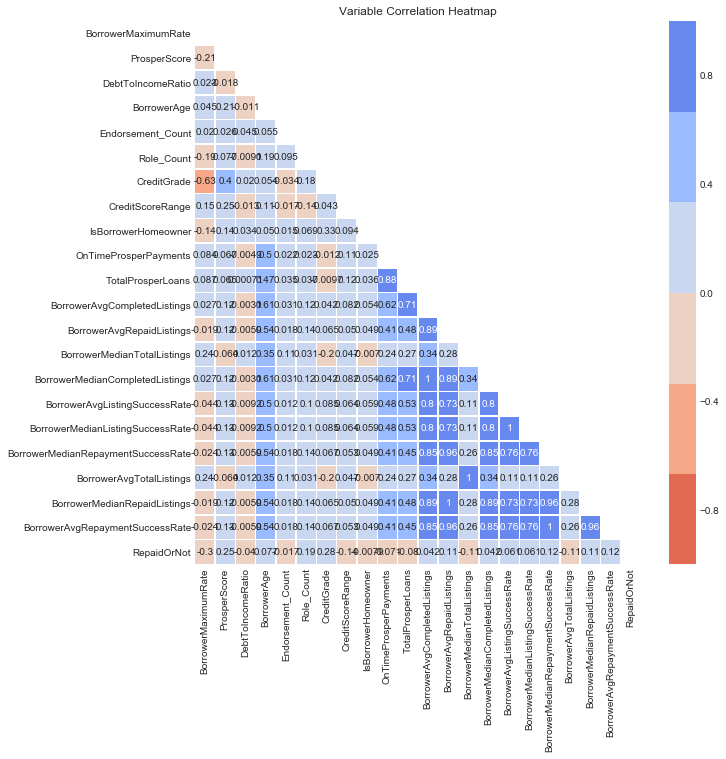

In [10]:
corr = data[features.get("Borrower")+["RepaidOrNot"]].fillna(-1).corr(method='pearson')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap=sns.color_palette("coolwarm_r"),
        mask = mask,
        vmin = -1,
        vmax= 1,
        linewidths=.5,
        annot=True)
plt.title("Variable Correlation Heatmap")
plt.show()

## Lender Features

In [11]:
X = data[features.get("Lender")].fillna(-1).as_matrix()
X = scaler.fit_transform(X)
y = data['RepaidOrNot'].as_matrix()
print features.get("Lender")
evaluation = evaluation_summary(X,y)
feature_values["Lender Features"] = evaluation.query("Model == 'RF'")["AUC"].item()
evaluation

[u'LenderYieldRate', u'LenderMedianTotalBids', u'LenderStdWinningBids', u'LenderStdTotalBids', u'LenderAvgBidWinningRate', u'LenderStdBidWinningRate', u'LenderMedianWinningBids', u'LenderAvgTotalBids', u'LenderMedianBidWinningRate', u'LenderAvgWinningBids', u'LenderSumUnlikelyBidAmount', u'LenderStdMedianBidAmount', u'LenderStdSumBidAmount', u'LenderSumUnlikelyBid', u'LenderMeanBidAmount', u'LenderMaxBidAmount', u'LenderMedianRepaidListings', u'LenderMedianListingSuccessRate', u'LenderAvgCompletedListings', u'LenderAvgRepaymentSuccessRate', u'LenderStdRepaymentSuccessRate', u'LenderStdTotalListings', u'LenderMedianCompletedListings', u'LenderAvgListingSuccessRate', u'LenderMedianRepaymentSuccessRate', u'LenderMedianTotalListings', u'LenderAvgTotalListings', u'LenderStdRepaidListings', u'LenderAvgRepaidListings', u'LenderStdCompletedListings', u'LenderStdListingSuccessRate']
Completed QDA in 0.348152 seconds
Completed CART in 3.5077144 seconds
Completed GNB in 0.1772271 seconds
Complete

,Model,Accuracy,Precision,Recall,F1,AUC
0,QDA,0.539,0.523,0.899,0.661,0.539
1,CART,0.578,0.578,0.579,0.579,0.578
2,GNB,0.552,0.531,0.891,0.665,0.552
3,RF,0.654,0.666,0.619,0.642,0.654
4,LR,0.578,0.852,0.188,0.308,0.578
5,ADB,0.659,0.673,0.619,0.645,0.659


In [12]:
# frank_summary(X, y, features.get("Lender"))

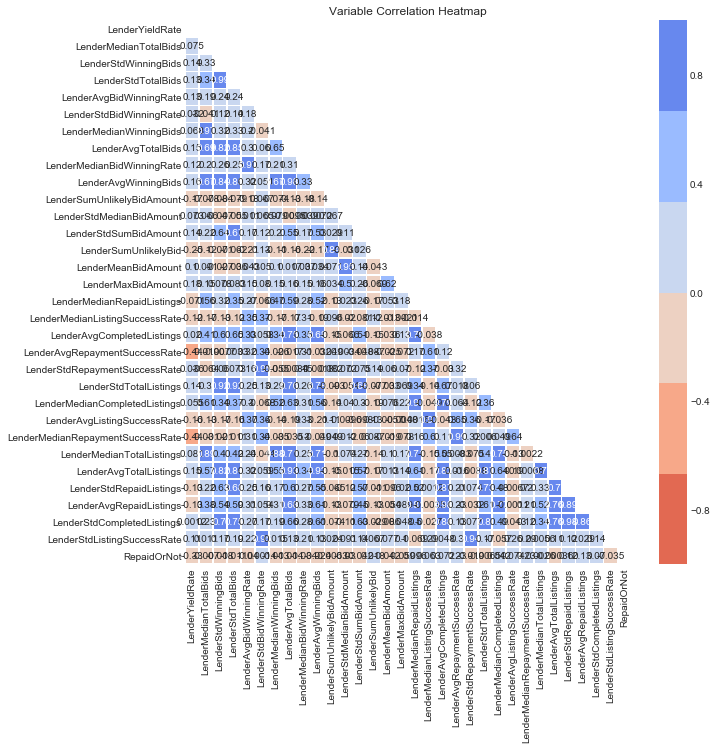

In [13]:
corr = data[features.get("Lender")+["RepaidOrNot"]].fillna(-1).corr(method='pearson')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap=sns.color_palette("coolwarm_r"),
        mask = mask,
        vmin = -1,
        vmax= 1,
        linewidths=.5,
        annot=True)
plt.title("Variable Correlation Heatmap")
plt.show()

## Loan Features

In [14]:
X = data[features.get("Loan")].fillna(-1).as_matrix()
X = scaler.fit_transform(X)
y = data['RepaidOrNot'].as_matrix()
print features.get("Loan")
evaluation = evaluation_summary(X,y)
feature_values["Loan Features"] = evaluation.query("Model == 'RF'")["AUC"].item()
evaluation

[u'BorrowerRate', u'AgeInMonths', u'EstimatedLoss', u'MonthlyLoanPayment', u'AmountRequested']
Completed QDA in 0.0611159 seconds
Completed CART in 0.3452065 seconds
Completed GNB in 0.0464622 seconds
Completed RF in 42.5058904 seconds
Completed LR in 0.144936 seconds
Completed ADB in 2.714487 seconds


,Model,Accuracy,Precision,Recall,F1,AUC
0,QDA,0.656,0.620,0.806,0.701,0.656
1,CART,0.615,0.620,0.592,0.606,0.615
2,GNB,0.598,0.567,0.827,0.673,0.598
3,RF,0.659,0.665,0.639,0.652,0.659
4,LR,0.586,0.843,0.210,0.336,0.586
5,ADB,0.670,0.688,0.621,0.653,0.670


In [15]:
# frank_summary(X, y, features.get("Loan"))

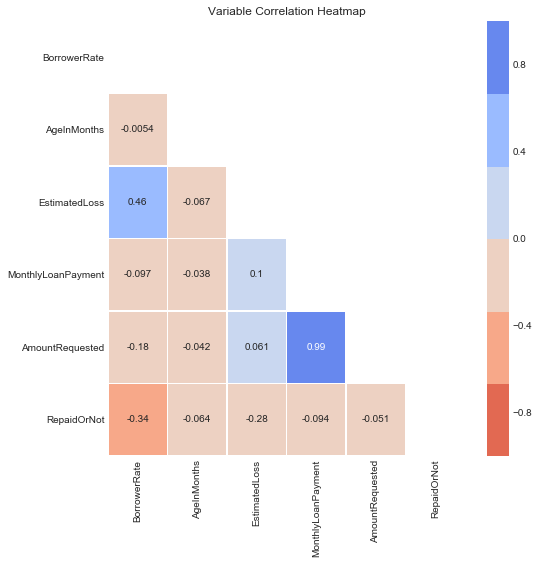

In [16]:
corr = data[features.get("Loan")+["RepaidOrNot"]].fillna(-1).corr(method='pearson')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8,8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap=sns.color_palette("coolwarm_r"),
        mask = mask,
        vmin = -1,
        vmax= 1,
        linewidths=.5,
        annot=True)
plt.title("Variable Correlation Heatmap")
plt.show()

## Project Features

In [17]:
X = data[features.get("Listing")].fillna(-1).as_matrix()
X = scaler.fit_transform(X)
y = data['RepaidOrNot'].as_matrix()
print features.get("Listing")
evaluation = evaluation_summary(X,y)
feature_values["Project Features"] = evaluation.query("Model == 'RF'")["AUC"].item()
evaluation

[u'BidCount', u'BidMaximumRate', u'AvgInterBidTime', u'Gini', u'TimeToFirstBid', u'TimeBetweenFirstLastBid', u'DescriptionLength']
Completed QDA in 0.0732201 seconds
Completed CART in 0.7923783 seconds
Completed GNB in 0.0500673 seconds
Completed RF in 64.5931803 seconds
Completed LR in 0.1601696 seconds
Completed ADB in 4.1518672 seconds


,Model,Accuracy,Precision,Recall,F1,AUC
0,QDA,0.536,0.520,0.939,0.669,0.536
1,CART,0.569,0.568,0.574,0.571,0.569
2,GNB,0.548,0.528,0.910,0.668,0.548
3,RF,0.642,0.654,0.605,0.628,0.642
4,LR,0.568,0.884,0.156,0.266,0.568
5,ADB,0.648,0.667,0.593,0.628,0.648


In [18]:
# frank_summary(X, y, features.get("Listing"))

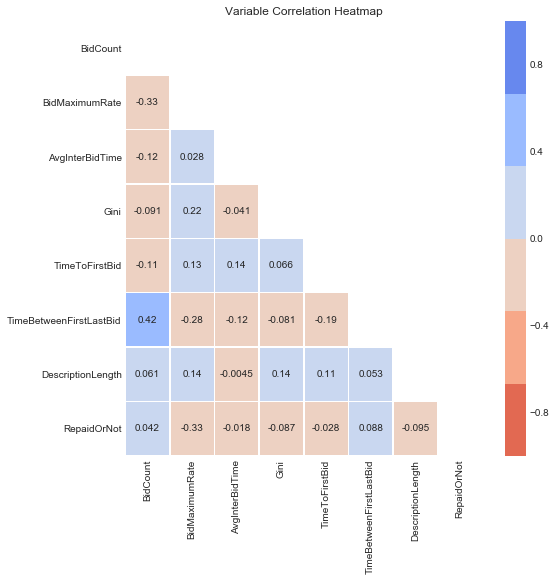

In [19]:
corr = data[features.get("Listing")+["RepaidOrNot"]].fillna(-1).corr(method='pearson')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8,8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap=sns.color_palette("coolwarm_r"),
        mask = mask,
        vmin = -1,
        vmax= 1,
        linewidths=.5,
        annot=True)
plt.title("Variable Correlation Heatmap")
plt.show()

# Feature Permutation

## Lender + Borrower Features

In [20]:
X = data[features.get("Lender")+features.get("Borrower")].fillna(-1).as_matrix()
X = scaler.fit_transform(X)
y = data['RepaidOrNot'].as_matrix()
evaluation = evaluation_summary(X,y)
feature_values["Lender + Borrower"] = evaluation.query("Model == 'RF'")["AUC"].item()
evaluation

Completed QDA in 0.5978035 seconds
Completed CART in 3.9923656 seconds
Completed GNB in 0.2944202 seconds
Completed RF in 138.7807763 seconds
Completed LR in 4.9125933 seconds
Completed ADB in 17.6629879 seconds


,Model,Accuracy,Precision,Recall,F1,AUC
0,QDA,0.556,0.545,0.676,0.604,0.556
1,CART,0.614,0.614,0.614,0.614,0.614
2,GNB,0.662,0.650,0.701,0.675,0.662
3,RF,0.696,0.704,0.676,0.689,0.696
4,LR,0.627,0.853,0.306,0.451,0.627
5,ADB,0.692,0.707,0.657,0.681,0.692


## Lender + Loan Features

In [21]:
X = data[features.get("Lender")+features.get("Loan")].fillna(-1).as_matrix()
X = scaler.fit_transform(X)
y = data['RepaidOrNot'].as_matrix()
evaluation = evaluation_summary(X,y)
feature_values["Lender + Loan"] = evaluation.query("Model == 'RF'")["AUC"].item()
evaluation

Completed QDA in 0.3682031 seconds
Completed CART in 3.9531553 seconds
Completed GNB in 0.1960383 seconds
Completed RF in 157.7657356 seconds
Completed LR in 2.6395044 seconds
Completed ADB in 16.4371596 seconds


,Model,Accuracy,Precision,Recall,F1,AUC
0,QDA,0.577,0.548,0.879,0.675,0.577
1,CART,0.586,0.586,0.583,0.585,0.586
2,GNB,0.608,0.575,0.834,0.680,0.608
3,RF,0.672,0.682,0.644,0.662,0.672
4,LR,0.602,0.853,0.247,0.383,0.602
5,ADB,0.667,0.682,0.629,0.654,0.667


## Lender + Project Features

In [22]:
X = data[features.get("Lender")+features.get("Listing")].fillna(-1).as_matrix()
X = scaler.fit_transform(X)
y = data['RepaidOrNot'].as_matrix()
evaluation = evaluation_summary(X,y)
feature_values["Lender + Project"] = evaluation.query("Model == 'RF'")["AUC"].item()
evaluation

Completed QDA in 0.4098156 seconds
Completed CART in 4.303102 seconds
Completed GNB in 0.2097516 seconds
Completed RF in 170.1660492 seconds
Completed LR in 4.1208747 seconds
Completed ADB in 18.045537 seconds


,Model,Accuracy,Precision,Recall,F1,AUC
0,QDA,0.536,0.521,0.905,0.661,0.536
1,CART,0.582,0.583,0.576,0.579,0.582
2,GNB,0.571,0.544,0.873,0.670,0.571
3,RF,0.659,0.671,0.622,0.646,0.659
4,LR,0.583,0.855,0.199,0.323,0.583
5,ADB,0.660,0.675,0.619,0.645,0.660


## Lender + Loan + Project Features

In [23]:
X = data[features.get("Lender")+features.get("Loan")+features.get("Listing")].fillna(-1).as_matrix()
X = scaler.fit_transform(X)
y = data['RepaidOrNot'].as_matrix()
evaluation = evaluation_summary(X,y)
feature_values["Lender + Loan + Project"] = evaluation.query("Model == 'RF'")["AUC"].item()
evaluation

Completed QDA in 0.4842962 seconds
Completed CART in 4.6881704 seconds
Completed GNB in 0.2355626 seconds
Completed RF in 159.8290947 seconds
Completed LR in 8.9419783 seconds
Completed ADB in 19.2159035 seconds


,Model,Accuracy,Precision,Recall,F1,AUC
0,QDA,0.573,0.545,0.882,0.674,0.573
1,CART,0.587,0.586,0.589,0.588,0.587
2,GNB,0.611,0.577,0.834,0.682,0.611
3,RF,0.673,0.685,0.642,0.663,0.673
4,LR,0.603,0.852,0.248,0.384,0.602
5,ADB,0.668,0.681,0.634,0.656,0.668


## Borrower + Loan Features

In [24]:
X = data[features.get("Borrower")+features.get("Loan")].fillna(-1).as_matrix()
X = scaler.fit_transform(X)
y = data['RepaidOrNot'].as_matrix()
evaluation = evaluation_summary(X,y)
feature_values["Borrower + Loan"] = evaluation.query("Model == 'RF'")["AUC"].item()
evaluation

Completed QDA in 0.2509148 seconds
Completed CART in 0.7710785 seconds
Completed GNB in 0.1459627 seconds
Completed RF in 50.673137 seconds
Completed LR in 1.1995801 seconds
Completed ADB in 4.3336975 seconds


,Model,Accuracy,Precision,Recall,F1,AUC
0,QDA,0.591,0.567,0.768,0.652,0.591
1,CART,0.627,0.625,0.634,0.630,0.627
2,GNB,0.678,0.741,0.546,0.629,0.678
3,RF,0.705,0.709,0.696,0.702,0.705
4,LR,0.636,0.858,0.327,0.473,0.636
5,ADB,0.703,0.714,0.679,0.696,0.703


## Borrower + Project Features

In [25]:
X = data[features.get("Borrower")+features.get("Listing")].fillna(-1).as_matrix()
X = scaler.fit_transform(X)
y = data['RepaidOrNot'].as_matrix()
evaluation = evaluation_summary(X,y)
feature_values["Borrower + Project"] = evaluation.query("Model == 'RF'")["AUC"].item()
evaluation

Completed QDA in 0.2736224 seconds
Completed CART in 1.2058892 seconds
Completed GNB in 0.1463309 seconds
Completed RF in 64.468485 seconds
Completed LR in 1.0821474 seconds
Completed ADB in 5.8041727 seconds


,Model,Accuracy,Precision,Recall,F1,AUC
0,QDA,0.563,0.538,0.901,0.674,0.563
1,CART,0.615,0.614,0.618,0.616,0.615
2,GNB,0.667,0.690,0.607,0.646,0.667
3,RF,0.694,0.699,0.679,0.689,0.694
4,LR,0.625,0.859,0.298,0.443,0.625
5,ADB,0.696,0.710,0.660,0.684,0.696


## Borrower + Loan + Project Features

In [26]:
X = data[features.get("Borrower")+features.get("Loan")+features.get("Listing")].fillna(-1).as_matrix()
X = scaler.fit_transform(X)
y = data['RepaidOrNot'].as_matrix()
evaluation = evaluation_summary(X,y)
feature_values["Borrower + Loan + Project"] = evaluation.query("Model == 'RF'")["AUC"].item()
evaluation

Completed QDA in 0.3488841 seconds
Completed CART in 1.5464745 seconds
Completed GNB in 0.1909081 seconds
Completed RF in 69.5339536 seconds
Completed LR in 1.988578 seconds
Completed ADB in 6.9949223 seconds


,Model,Accuracy,Precision,Recall,F1,AUC
0,QDA,0.571,0.562,0.639,0.598,0.571
1,CART,0.622,0.621,0.627,0.624,0.622
2,GNB,0.679,0.696,0.634,0.663,0.679
3,RF,0.708,0.712,0.696,0.704,0.708
4,LR,0.638,0.859,0.329,0.476,0.638
5,ADB,0.703,0.714,0.677,0.695,0.703


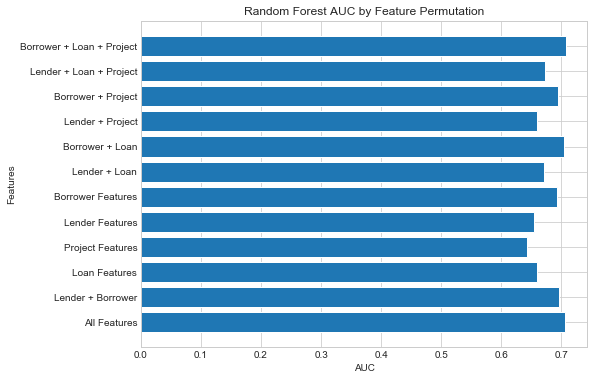

In [27]:
## TODO: Refactor code below. Remove hard-coding
feature_labels  = ["All Features", "Lender + Borrower", 
                   "Loan Features", "Project Features",
                   "Lender Features", "Borrower Features", 
                   "Lender + Loan", "Borrower + Loan",
                   "Lender + Project", "Borrower + Project", 
                   "Lender + Loan + Project", "Borrower + Loan + Project"
                   ]
feature_values = [feature_values.get(feature) for feature in feature_labels]

ind = np.arange(len(feature_values)) 

fig, ax = plt.subplots(figsize=(8,6))
y_pos = list(reversed(np.arange(len(feature_labels))))
performance = feature_values

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_labels)
ax.invert_yaxis()
ax.set_ylabel("Features")
ax.set_xlabel('AUC')
ax.set_title('Random Forest AUC by Feature Permutation')

plt.show()

## Models Comparison

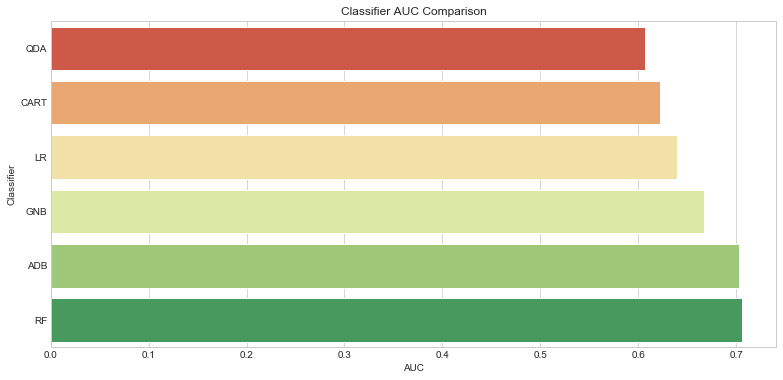

In [28]:
X = data[features.get("All")].fillna(-1).as_matrix()
X = scaler.fit_transform(X)
y = data['RepaidOrNot'].as_matrix()
plot_auc(X,y, classifiers.keys())

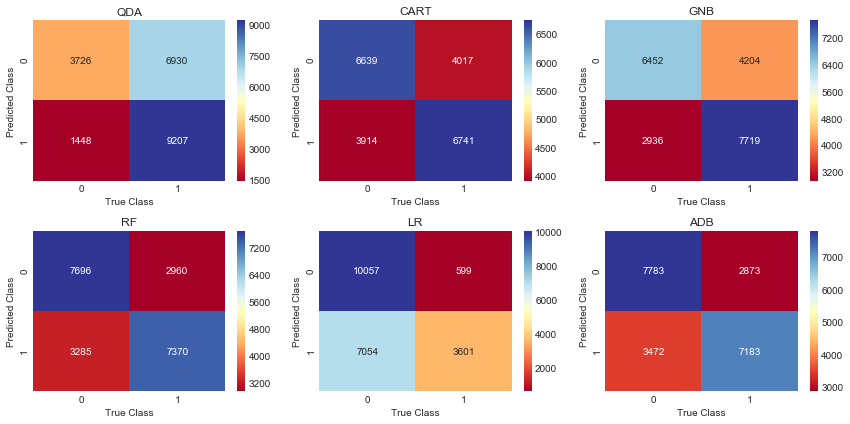

In [29]:
X = data[features.get("All")].fillna(-1).as_matrix()
X = scaler.fit_transform(X)
y = data['RepaidOrNot'].as_matrix()
plot_confusion_matrix(X,y)

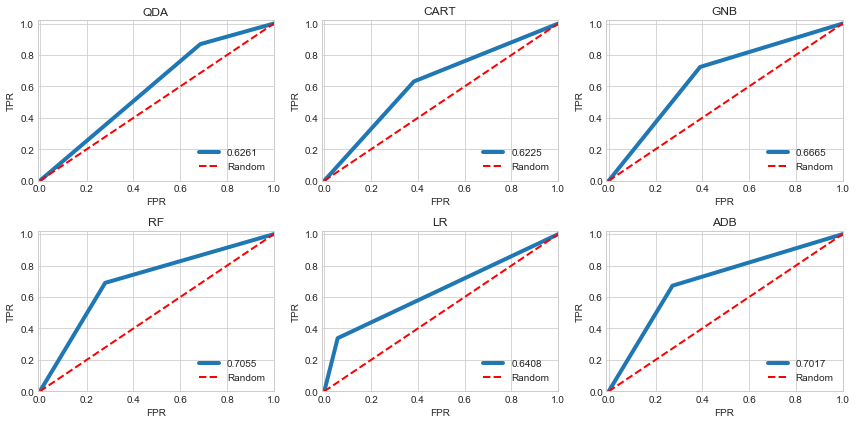

In [30]:
X = data[features.get("All")].fillna(-1).as_matrix()
X = scaler.fit_transform(X)
y = data['RepaidOrNot'].as_matrix()
plot_roc(X,y)

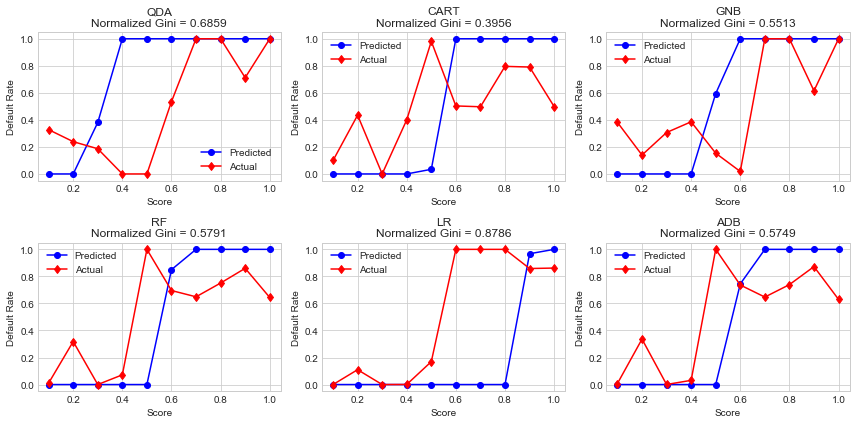

In [31]:
X = data[features.get("All")].fillna(-1).as_matrix()
X = scaler.fit_transform(X)
y = data['RepaidOrNot'].as_matrix()
plot_lift(X,y)

# Ensemble Soft-Voting Classifier

In [32]:
X = data[features.get("All")].fillna(-1).as_matrix()
X = scaler.fit_transform(X)
y = data['RepaidOrNot'].as_matrix()

eclf_soft = VotingClassifier(estimators=[('ADB', classifiers.get('ADB')),
                                       ('LR', classifiers.get('LR')),
                                       ('RF', classifiers.get('RF'))],
                               voting='soft',
                               n_jobs=-1)

y_pred = run_cv(X,y,eclf_soft)
print accuracy(y, y_pred), precision(y, y_pred), recall(y, y_pred), f1(y, y_pred), auc(y, y_pred)

0.6860306883768945 0.8087227414330218 0.48728296574378227 0.6081405563689605 0.686021362751771
